In [96]:
from hough_line_corner_detector import HoughLineCornerDetector
from processors import Resizer, OtsuThresholder, FastDenoiser, EdgeDetector, Closer
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from itertools import combinations
from collections import defaultdict

In [355]:
# image_path = 'input/13d4bcaf-4e2c-40f1-8ce7-67ad26317f74.jpg'
# image_path = 'input/receipt.jpg'
image_path = 'input/IMG_3009.jpg'

In [356]:
img = cv2.imread(image_path)

In [357]:
from matplotlib import pyplot as plt
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def show(x_img):
    plt.imshow(x_img)
    plt.title('my picture')
    plt.show()




In [358]:
import math

def show_mul(title_img_tuples):
    cols = len(title_img_tuples)
    if cols > 5:
        cols = 5
    rows = math.ceil(len(title_img_tuples)/cols)
#     print(cols, rows)

    for i, t_im in enumerate(title_img_tuples):
        
        plt.subplot(rows, cols , i+1, title=t_im[0])
        plt.imshow(t_im[1])
    plt.savefig('final_image_name.jpg') # To save figure

    plt.show()

# show_mul([
#     ('a', img), ('b', img)
#      ])


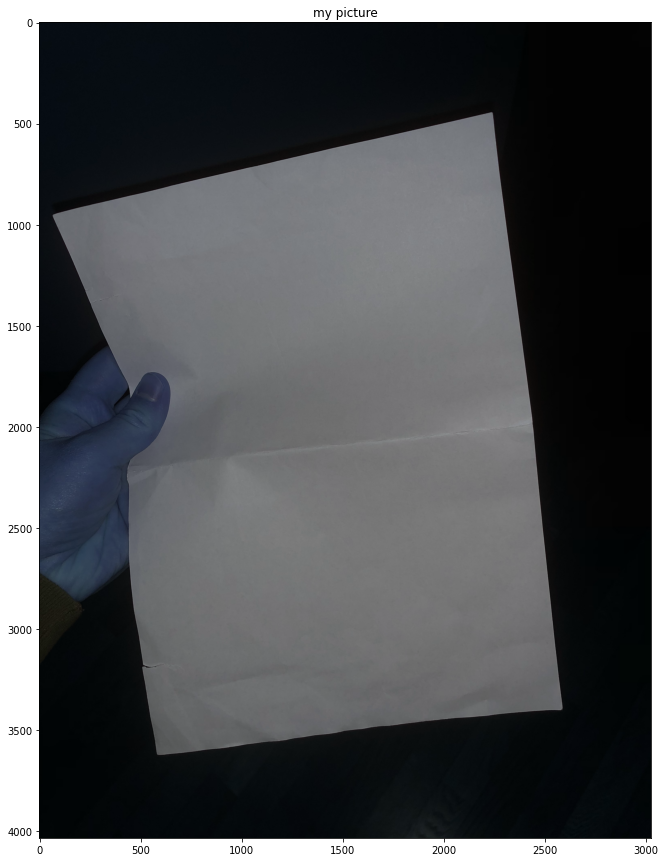

In [359]:
show(img)

In [360]:
# Resizer(height = 1280, output_process = True), 
#             FastDenoiser(strength = 9, output_process = True),
#             OtsuThresholder(output_process = True)

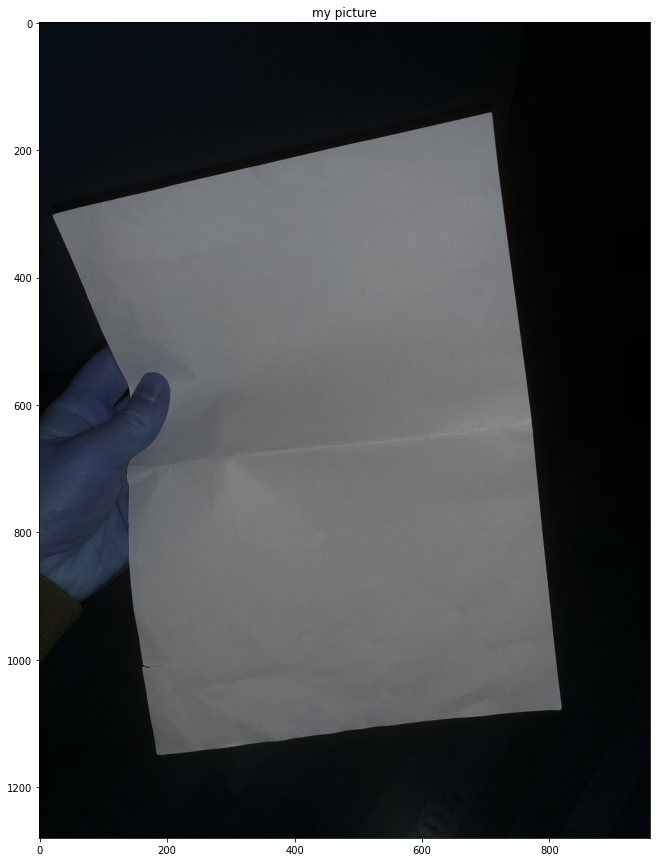

In [361]:
img = Resizer(height = 1280)(img)
show(img)

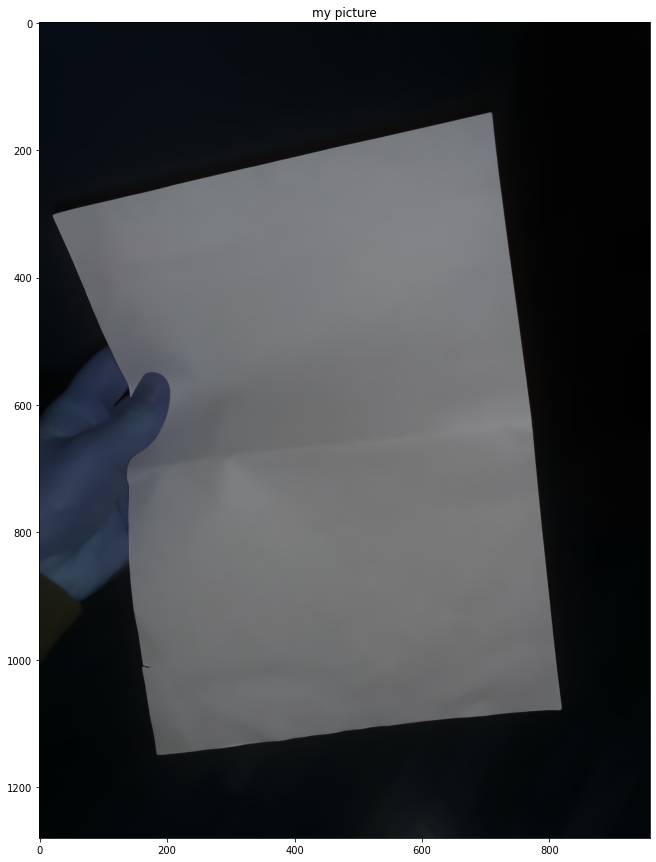

In [362]:
img = FastDenoiser(strength = 9)(img)
show(img)

In [363]:
# img = OtsuThresholder()(img)
# show(img)

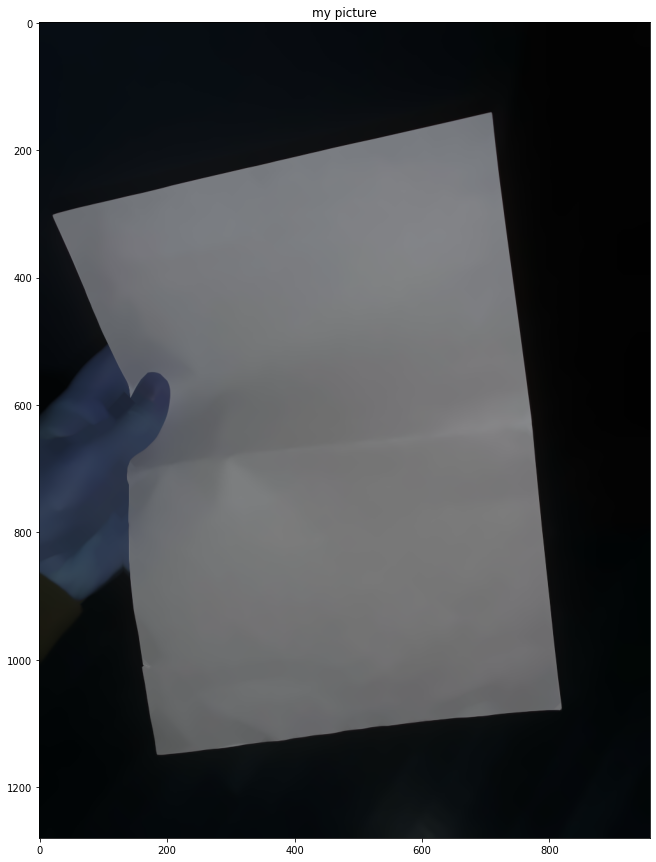

In [364]:

img = Closer()(img)
show(img)

In [365]:

# class EdgeDetector:
#     def __init__(self, output_process = False):
#         self.output_process = output_process


#     def __call__(self, image, thresh1 = 50, thresh2 = 150, apertureSize = 3):
#         edges = cv2.Canny(image, thresh1, thresh2, apertureSize = apertureSize)
#         if self.output_process: cv2.imwrite('output/edges.jpg', edges)
#         return edges

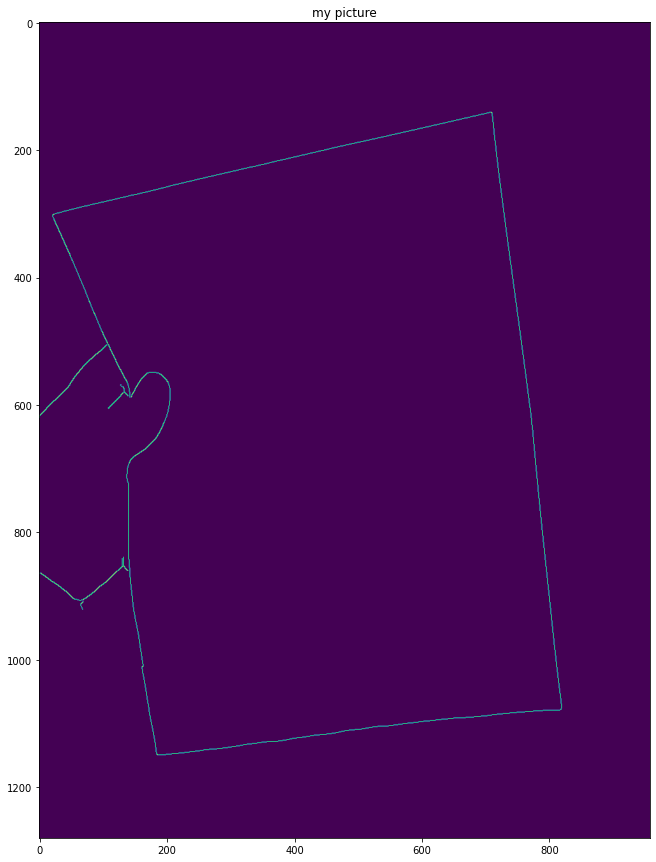

In [366]:
edges_img = cv2.Canny(image=img, 
              threshold1=50,
              threshold2=810,
              apertureSize = 5
             )
show(
    edges_img
)

In [367]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

In [368]:
def _draw_hough_lines(lines):
        hough_line_output = img.copy()
        
        res = []
        for line in lines:
            rho, theta = line[0]
            print(theta)
            
            
            allowed_skew = np.pi/6
            good = (theta > np.pi - allowed_skew) or ( np.pi/2 - allowed_skew <theta < np.pi/2 + allowed_skew)
            
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            n = 5000
            x1 = int(x0 + n * (-b))
            y1 = int(y0 + n * (a))
            x2 = int(x0 - n * (-b))
            y2 = int(y0 - n * (a))
            if good:
                im = hough_line_output.copy()
                cv2.line(
                    im, 
                    (x1, y1), 
                    (x2, y2), 
                    (0, 0, 255) if good else (0, 0, 0),
                    3 if good else 1
                )
                res.append((round(theta, 1), im))
#         show(hough_line_output)
        show_mul(res)
        

32
1.3439035
3.0368729
3.0106928
3.0281463
1.3351768
1.3526301
1.4398966
3.0194197
3.0019662
3.0455995
2.7314403
2.740167
2.7488935
1.4573499
1.43117
1.4486233
1.4660766
1.4748032
0.0
1.4835298
3.0194197
2.7227137
2.9757864
3.054326
1.4573499
2.9932396
3.0019662
2.984513
0.008726646
3.132866
3.0106928
2.7139869


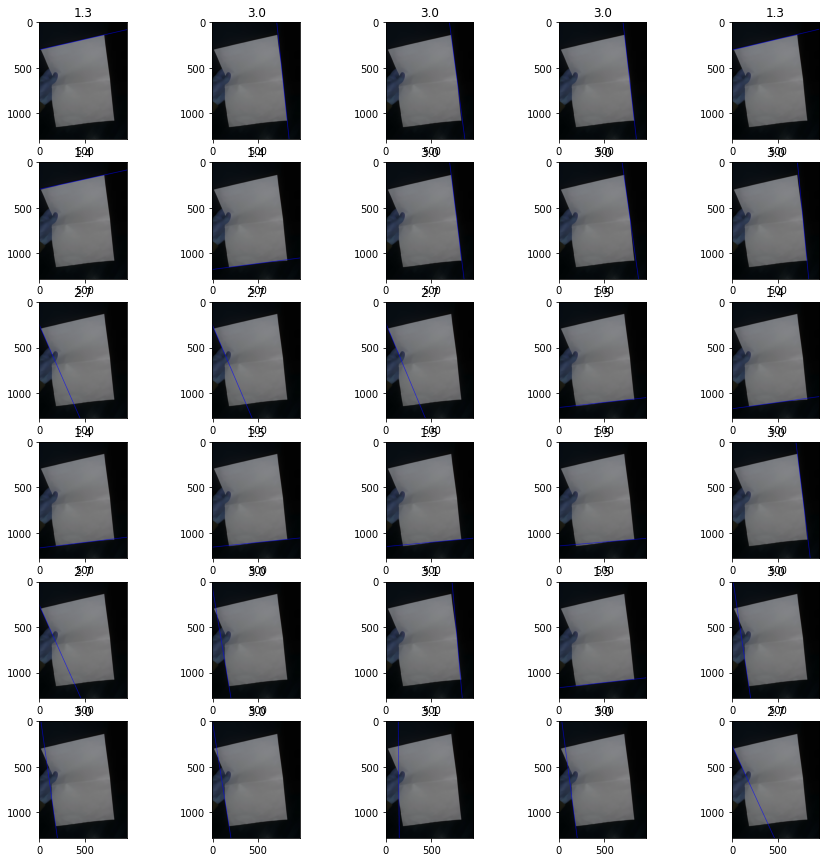

In [370]:
lines = cv2.HoughLines(
            edges_img, 
            rho=1, 
            theta=np.pi / 360, 
            threshold=100
        )

print(len(lines))

_draw_hough_lines(lines)

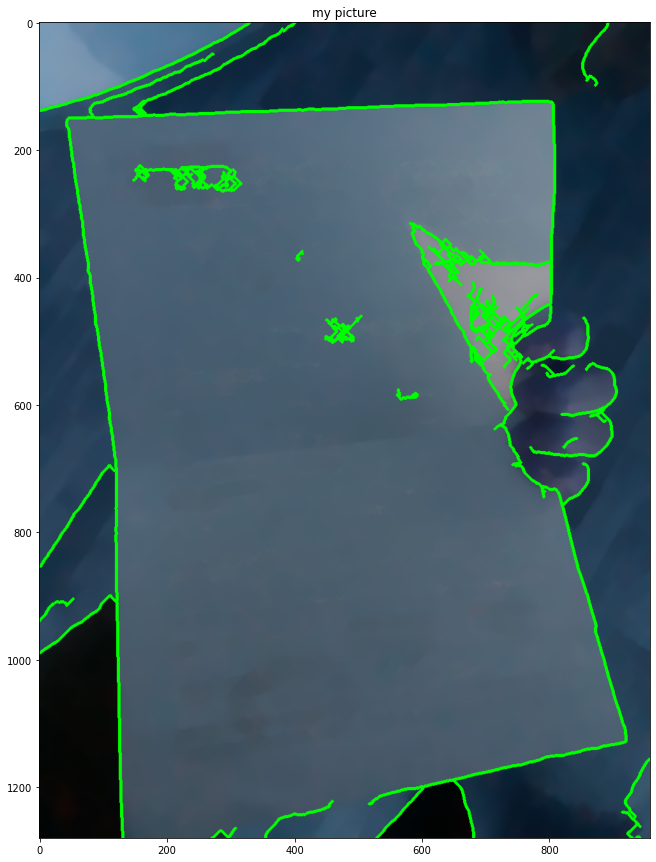

In [351]:
image = img.copy()
cnts = cv2.findContours(edges_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv2.drawContours(image,[c], 0, (0,255,0), 3)

show(image)

In [352]:
max(image.shape)//2

640

6198


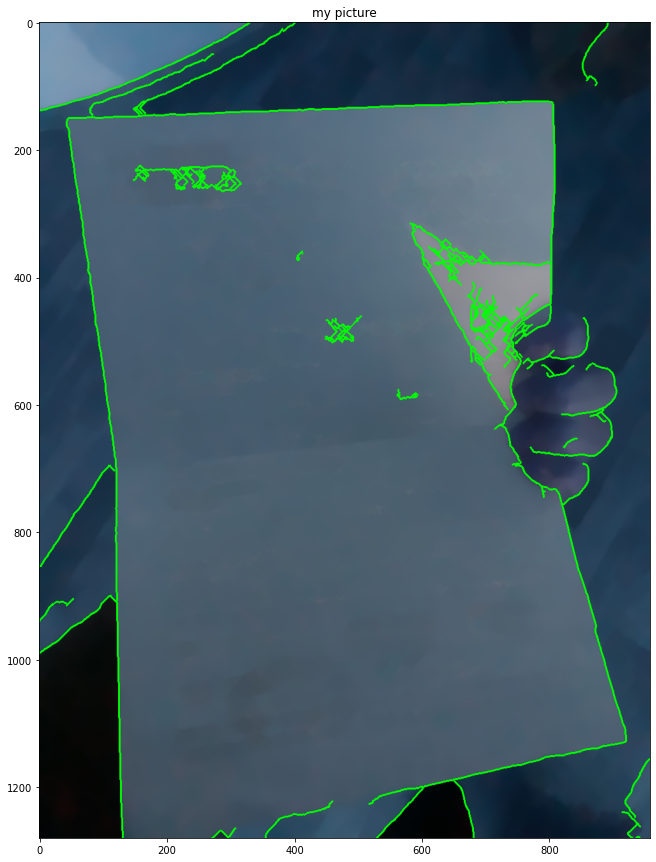

In [353]:
image = img.copy()
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 100
lines = cv2.HoughLinesP(            
            edges_img, 
            rho=0.5, 
            theta=np.pi / 360, 
            threshold=-10,
            minLineLength=0
    
)

print(len(lines))
for l in lines:
#     print(l)
    x1,y1,x2,y2 = l[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
# _draw_hough_lines(lines)
show(image)

In [48]:
image = img.copy()

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

#Detect lines in the image
lines = lsd.detect(image[0]) #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
drawn_img = lsd.drawSegments(image,lines)

#Show image
cv2.imshow("LSD",drawn_img )
cv2.waitKey(0)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/lsd.cpp:143: error: (-213:The function/feature is not implemented) Implementation has been removed due original code license issues in function 'LineSegmentDetectorImpl'
